In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Steel_industry.csv')
df

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35036,31-12-2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31-12-2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31-12-2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31-12-2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [ ]:
# The date, time and day of the week is irrelevant, so we drop them
df.drop(['Date_Time', 'Day_Of_Week'], axis=1, inplace=True)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Light_Load
...,...,...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Light_Load
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Light_Load


In [ ]:
df['WeekStatus'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
mapping1 = {
    'Weekday': 0,
    'Weekend': 1
}

df['WeekStatus'] = df['WeekStatus'].map(mapping1)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,Light_Load
...,...,...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,Light_Load
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,0,Light_Load


In [ ]:
df['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [ ]:
mapping2 = {
    'Light_Load': 0,
    'Medium_Load': 1,
    'Maximum_Load': 2
}

df['Load_Type'] = df['Load_Type'].map(mapping2)
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,0
...,...,...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,0
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,0,0


In [ ]:
df.nunique()

Usage_kWh                               3344
Lagging_Current_Reactive.Power_kVarh    1954
Leading_Current_Reactive_Power_kVarh     769
CO2(tCO2)                                  8
Lagging_Current_Power_Factor            5079
Leading_Current_Power_Factor            3366
NSM                                       96
WeekStatus                                 2
Load_Type                                  3
dtype: int64

In [ ]:
X = df.drop(['Load_Type'], axis=1)
X

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0
...,...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,0


In [ ]:
y = df['Load_Type']
y

0        0
1        0
2        0
3        0
4        0
        ..
35036    0
35037    0
35038    0
35039    0
35040    0
Name: Load_Type, Length: 35041, dtype: int64

In [ ]:
X.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
dtype: int64

In [ ]:
y.isnull().sum()

0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

model = DecisionTreeClassifier(criterion='entropy', random_state=19)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100} %")

Accuracy: 88.08674561278357 %


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.8494624121000198
Recall: 0.8490645238216684
F1 Score: 0.8492619355528724
Confusion Matrix:
[[3506  119   16]
 [ 116 1526  284]
 [  27  273 1142]]


In [ ]:
model.feature_importances_

array([0.24477629, 0.04082204, 0.0316582 , 0.00337053, 0.041883  ,
       0.03431745, 0.58611437, 0.01705811])

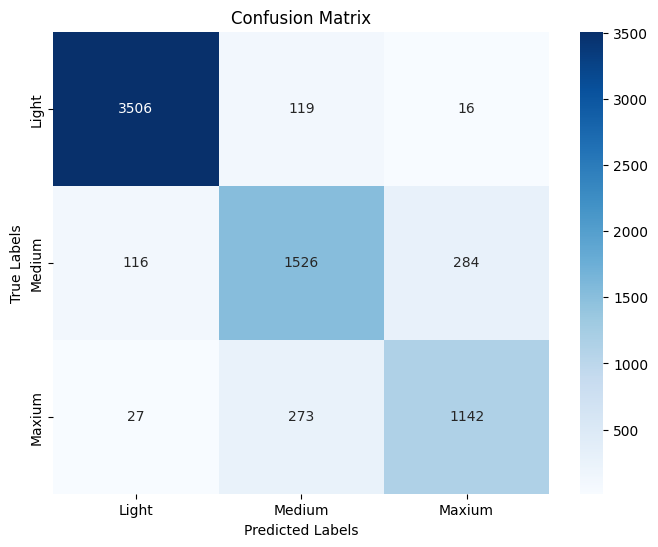

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_labels = ['Light', 'Medium', 'Maxium']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
